In [1]:
import os
REPOSITORY_PATH = r'/home/luis-felipe/UncEst'
DATA_PATH = os.path.join(REPOSITORY_PATH,'data')
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = os.path.join(REPOSITORY_PATH,'torch_models')
PATH_TRAINER = os.path.join(PATH_MODELS,'trainer')

PATH_FIGS = os.path.join(REPOSITORY_PATH,'figs','EvalMIMO')

In [ ]:
import os
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from collections import defaultdict

In [3]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


In [4]:
import NN_models as models
import NN_utils as utils
import NN_utils.train_and_eval as TE
import torch_data

In [5]:
from uncertainty.mimo import MIMO_ensemble

## Um

In [6]:
N_ENS = 3
model_path = PATH_MODELS
MODEL_ARC = 'VGG_16'
DATA = 'Cifar100'

data = torch_data.__dict__[DATA](data_dir = DATA_PATH)
model_class = models.__dict__[MODEL_ARC]

NAME = 'MIMO_VGG' +'_' + str(data.n_classes) +'_' + str(N_ENS)

model_path = PATH_MODELS
weights_path = os.path.join(model_path,NAME+".pt")

Files already downloaded and verified
Files already downloaded and verified


In [7]:
model = MIMOModel(model_class,num_classes = data.n_classes,ensemble_num = N_ENS)
model.softmax = True
state_dict = torch.load(weights_path)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [8]:
model = MIMO_ensemble(model).to(dev)
model.eval()
TE.model_acc(model,data.test_dataloader)

72.92

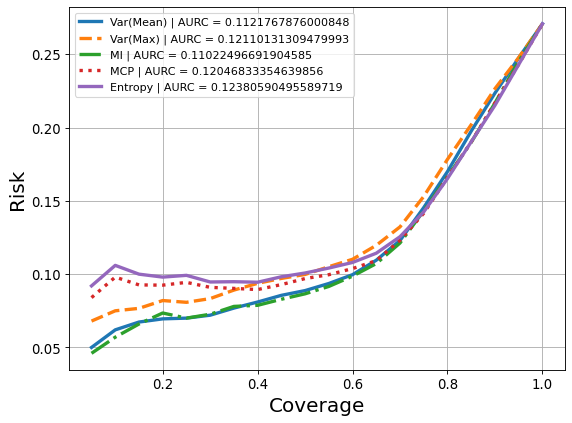

In [9]:
model.eval()
RC = metrics.selective_metrics(model,data.test_dataloader, c_list = np.arange(0.05,1.05,0.05))
RC.plot_RC(aurc = True)

## Todos

In [10]:
model_path = PATH_MODELS
MODEL_ARC = 'VGG_16'
DATA = 'Cifar100'

data = cifar_data.__dict__[DATA](data_dir = DATA_PATH)
model_class = models.__dict__[MODEL_ARC]
model_path = PATH_MODELS

Files already downloaded and verified
Files already downloaded and verified


In [13]:
accs = []
for N_ENS in range(2,6):
    NAME = 'MIMO_VGG' +'_' + str(data.n_classes) +'_' + str(N_ENS)


    weights_path = os.path.join(model_path,NAME+".pt")

    model = MIMOModel(model_class,num_classes = data.n_classes,ensemble_num = N_ENS)
    model.softmax = True
    state_dict = torch.load(weights_path)
    model.load_state_dict(state_dict)

    model = MIMO_ensemble(model).to(dev)
    model.eval()
    acc = TE.model_acc(model,data.test_dataloader)
    accs.append(acc)


Text(0.5, 0, 'M')

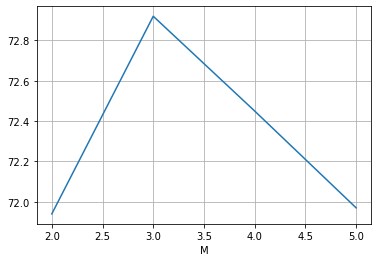

In [16]:
plt.plot(range(2,6),accs)
plt.grid()
plt.xlabel('M')

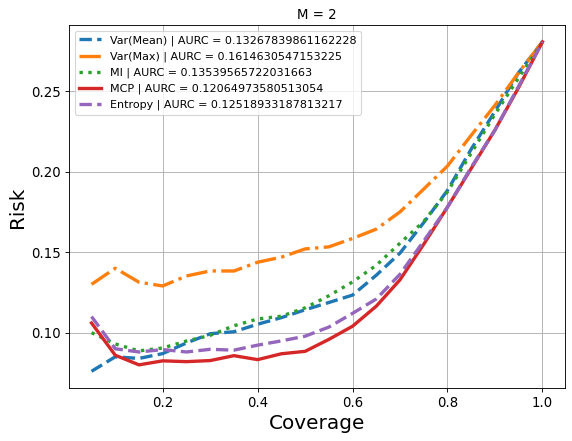

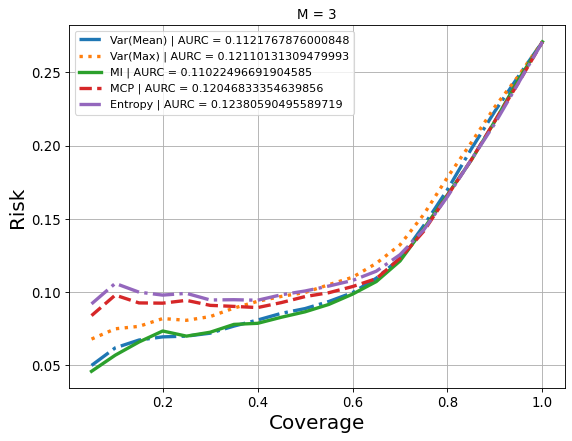

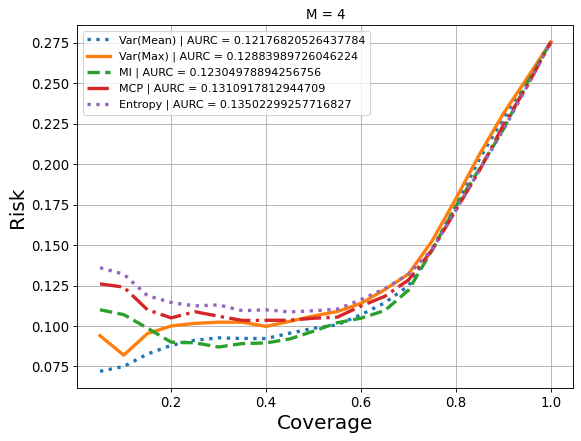

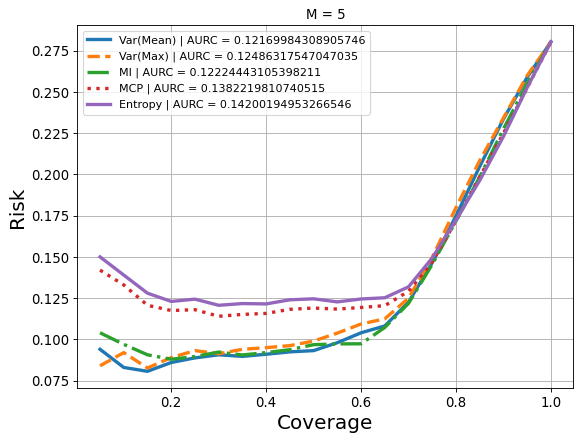

In [12]:
for N_ENS in range(2,6):
    NAME = 'MIMO_VGG' +'_' + str(data.n_classes) +'_' + str(N_ENS)


    weights_path = os.path.join(model_path,NAME+".pt")

    model = MIMOModel(model_class,num_classes = data.n_classes,ensemble_num = N_ENS)
    model.softmax = True
    state_dict = torch.load(weights_path)
    model.load_state_dict(state_dict)

    model = MIMO_ensemble(model).to(dev)
    model.eval()
    TE.model_acc(model,data.test_dataloader)

    model.eval()
    RC = metrics.selective_metrics(model,data.test_dataloader, c_list = np.arange(0.05,1.05,0.05))
    RC.plot_RC(aurc = True)
    plt.title(f'M = {N_ENS}')
    plt.show()